<a href="https://colab.research.google.com/github/alan713/alan1/blob/master/HW_3_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [3]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Change this to where you unzipped the Kaggle dataset
DATA_ROOT = "/content/denoising-dirty-documents"

TRAIN_DIR        = os.path.join(DATA_ROOT, "train")         # noisy
TRAIN_CLEAN_DIR  = os.path.join(DATA_ROOT, "train_cleaned") # clean ground truth

IMG_HEIGHT = 320   # following common practice for this dataset :contentReference[oaicite:1]{index=1}
IMG_WIDTH  = 480
CHANNELS   = 1     # grayscale


In [5]:
def numeric_key(path):
    """Sort '101.png', '2.png', ... by their numeric id."""
    base = os.path.basename(path)
    num = os.path.splitext(base)[0]
    return int(num)

def load_image(path):
    """Load PNG as float32 tensor in [0,1], resized to (H, W, 1)."""
    img_bytes = tf.io.read_file(path)
    img = tf.io.decode_png(img_bytes, channels=1)               # grayscale
    img = tf.image.convert_image_dtype(img, tf.float32)         # [0,1]
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    return img

noisy_paths = sorted(glob.glob(os.path.join(TRAIN_DIR, "*.png")), key=numeric_key)
clean_paths = sorted(glob.glob(os.path.join(TRAIN_CLEAN_DIR, "*.png")), key=numeric_key)

print("Noisy images:", len(noisy_paths))
print("Clean images:", len(clean_paths))
assert len(noisy_paths) == len(clean_paths), "Train and train_cleaned must match."


Noisy images: 0
Clean images: 0


In [8]:
import os

for root, dirs, files in os.walk("/content"):
    if "train" in dirs and "train_cleaned" in dirs:
        print("Possible DATA_ROOT:", root)


In [9]:
!ls /content


sample_data  sampleSubmission.csv  sampleSubmission.csv.zip


In [10]:
!unzip -q "/content/denoising-dirty-documents.zip" -d "/content/denoising-dirty-documents"


unzip:  cannot find or open /content/denoising-dirty-documents.zip, /content/denoising-dirty-documents.zip.zip or /content/denoising-dirty-documents.zip.ZIP.


In [11]:
!ls /content


sample_data	      sampleSubmission.csv.zip	train_cleaned.zip
sampleSubmission.csv  test.zip			train.zip


In [12]:
# Create root folder
!mkdir -p /content/denoising-dirty-documents

# Unzip train, train_cleaned, and test into subfolders
!unzip -q "/content/train.zip" -d "/content/denoising-dirty-documents/train"
!unzip -q "/content/train_cleaned.zip" -d "/content/denoising-dirty-documents/train_cleaned"
!unzip -q "/content/test.zip" -d "/content/denoising-dirty-documents/test"


In [13]:
!ls /content/denoising-dirty-documents
!ls /content/denoising-dirty-documents/train | head
!ls /content/denoising-dirty-documents/train_cleaned | head


test  train  train_cleaned
train
train_cleaned


In [14]:
import os, glob, numpy as np, tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd

DATA_ROOT = "/content/denoising-dirty-documents"

TRAIN_DIR       = os.path.join(DATA_ROOT, "train")
TRAIN_CLEAN_DIR = os.path.join(DATA_ROOT, "train_cleaned")

print("TRAIN_DIR exists:", os.path.isdir(TRAIN_DIR))
print("TRAIN_CLEAN_DIR exists:", os.path.isdir(TRAIN_CLEAN_DIR))
print("Noisy PNGs:", len(glob.glob(os.path.join(TRAIN_DIR, "*.png"))))
print("Clean PNGs:", len(glob.glob(os.path.join(TRAIN_CLEAN_DIR, "*.png"))))


TRAIN_DIR exists: True
TRAIN_CLEAN_DIR exists: True
Noisy PNGs: 0
Clean PNGs: 0


In [15]:
import os, glob, numpy as np, tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd

DATA_ROOT = "/content/denoising-dirty-documents"

# Notice the extra "train" / "train_cleaned" at the end:
TRAIN_DIR       = os.path.join(DATA_ROOT, "train", "train")
TRAIN_CLEAN_DIR = os.path.join(DATA_ROOT, "train_cleaned", "train_cleaned")
TEST_DIR        = os.path.join(DATA_ROOT, "test", "test")

print("TRAIN_DIR:", TRAIN_DIR)
print("TRAIN_CLEAN_DIR:", TRAIN_CLEAN_DIR)

print("TRAIN_DIR exists:", os.path.isdir(TRAIN_DIR))
print("TRAIN_CLEAN_DIR exists:", os.path.isdir(TRAIN_CLEAN_DIR))

print("Noisy PNGs:", len(glob.glob(os.path.join(TRAIN_DIR, "*.png"))))
print("Clean PNGs:", len(glob.glob(os.path.join(TRAIN_CLEAN_DIR, "*.png"))))


TRAIN_DIR: /content/denoising-dirty-documents/train/train
TRAIN_CLEAN_DIR: /content/denoising-dirty-documents/train_cleaned/train_cleaned
TRAIN_DIR exists: True
TRAIN_CLEAN_DIR exists: True
Noisy PNGs: 144
Clean PNGs: 144


In [16]:
IMG_HEIGHT = 320
IMG_WIDTH  = 480
CHANNELS   = 1

def numeric_key(path):
    base = os.path.basename(path)
    num = os.path.splitext(base)[0]
    return int(num)

def load_image(path):
    img_bytes = tf.io.read_file(path)
    img = tf.io.decode_png(img_bytes, channels=1)
    img = tf.image.convert_image_dtype(img, tf.float32)  # [0,1]
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    return img

noisy_paths = sorted(glob.glob(os.path.join(TRAIN_DIR, "*.png")), key=numeric_key)
clean_paths = sorted(glob.glob(os.path.join(TRAIN_CLEAN_DIR, "*.png")), key=numeric_key)

print("Noisy images:", len(noisy_paths))
print("Clean images:", len(clean_paths))

noisy_imgs = np.stack([load_image(p).numpy() for p in noisy_paths], axis=0)
clean_imgs = np.stack([load_image(p).numpy() for p in clean_paths], axis=0)

print("noisy_imgs:", noisy_imgs.shape, noisy_imgs.dtype)
print("clean_imgs:", clean_imgs.shape, clean_imgs.dtype)


Noisy images: 144
Clean images: 144
noisy_imgs: (144, 320, 480, 1) float32
clean_imgs: (144, 320, 480, 1) float32


In [17]:
import numpy as np
import os

num_samples = noisy_imgs.shape[0]
indices = np.arange(num_samples)
np.random.seed(42)
np.random.shuffle(indices)

train_end = int(0.7 * num_samples)
val_end   = int(0.85 * num_samples)

train_idx = indices[:train_end]
val_idx   = indices[train_end:val_end]
test_idx  = indices[val_end:]

x_train, y_train = noisy_imgs[train_idx], clean_imgs[train_idx]
x_val,   y_val   = noisy_imgs[val_idx],   clean_imgs[val_idx]
x_test,  y_test  = noisy_imgs[test_idx],  clean_imgs[test_idx]

# filenames for test set (for your MSE/SSIM table)
test_filenames = np.array([os.path.basename(p) for p in noisy_paths])[test_idx]

print("Train:", x_train.shape)
print("Val:  ", x_val.shape)
print("Test: ", x_test.shape)
print("Test filenames sample:", test_filenames[:5])


Train: (100, 320, 480, 1)
Val:   (22, 320, 480, 1)
Test:  (22, 320, 480, 1)
Test filenames sample: ['96.png' '194.png' '57.png' '45.png' '162.png']


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)

    # ----- Encoder -----
    x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    encoded = layers.MaxPooling2D((2, 2), padding="same")(x)

    # ----- Decoder -----
    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2D(1, (3, 3), padding="same", activation="sigmoid")(x)

    model = models.Model(inputs, outputs, name="doc_denoiser_autoencoder")
    return model

input_shape = x_train.shape[1:]  # (320, 480, 1)
autoencoder = build_autoencoder(input_shape)

autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mse"],
)

autoencoder.summary()


Model: "doc_denoiser_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 320, 480, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 320, 480, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 160, 240, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 240, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 80, 120, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 120, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 160, 240, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 160, 240, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 320, 480, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 320, 480, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
import time

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epoch_times = []
        self.cum_times = []
        self._train_start = time.time()

    def on_epoch_begin(self, epoch, logs=None):
        self._epoch_start = time.time()

    def on_epoch_end(self, epoch, logs=None):
        t = time.time() - self._epoch_start
        self.epoch_times.append(t)
        self.cum_times.append(time.time() - self._train_start)

time_cb = TimeHistory()


In [20]:
BATCH_SIZE = 4
EPOCHS = 50

history = autoencoder.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[time_cb],
)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 0.1179 - mse: 0.1179 - val_loss: 0.0673 - val_mse: 0.0673
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0668 - val_mse: 0.0668
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0637 - mse: 0.0637 - val_loss: 0.0492 - val_mse: 0.0492
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0405 - val_mse: 0.0405
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0

In [21]:
import pandas as pd

# Predict denoised images for the held-out test set
y_pred = autoencoder.predict(x_test, batch_size=1)

mse_list = []
ssim_list = []

for i in range(y_test.shape[0]):
    clean_img = y_test[i]        # (H, W, 1)
    pred_img  = y_pred[i]

    # Per-image MSE
    mse_i = np.mean((clean_img - pred_img) ** 2)

    # Per-image SSIM (TensorFlow expects batch dimension)
    ssim_i = tf.image.ssim(
        clean_img[None, ...],
        pred_img[None, ...],
        max_val=1.0
    ).numpy()[0]

    mse_list.append(float(mse_i))
    ssim_list.append(float(ssim_i))

results_df = pd.DataFrame({
    "filename": test_filenames,
    "MSE": mse_list,
    "SSIM": ssim_list,
})

print(results_df.head())
print("\nAverage MSE:", results_df["MSE"].mean())
print("Average SSIM:", results_df["SSIM"].mean())

# Save to CSV for your report / submission
results_df.to_csv("denoising_metrics_test.csv", index=False)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
  filename       MSE      SSIM
0   96.png  0.004714  0.941829
1  194.png  0.008114  0.931429
2   57.png  0.005343  0.946387
3   45.png  0.005992  0.943046
4  162.png  0.005707  0.924448

Average MSE: 0.006089322480627082
Average SSIM: 0.9366136328740553


In [22]:
import matplotlib.pyplot as plt

train_mse = history.history["mse"]
val_mse   = history.history["val_mse"]
train_loss = history.history["loss"]
val_loss   = history.history["val_loss"]

t = time_cb.cum_times
epochs = range(1, len(train_mse) + 1)


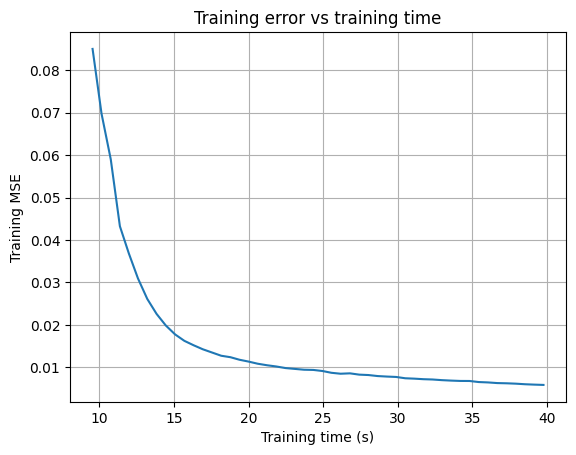

In [23]:
plt.figure()
plt.plot(t, train_mse)
plt.xlabel("Training time (s)")
plt.ylabel("Training MSE")
plt.title("Training error vs training time")
plt.grid(True)
plt.show()


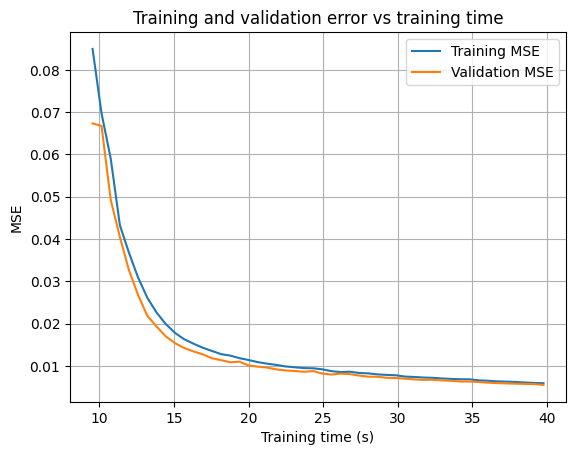

In [24]:
plt.figure()
plt.plot(t, train_mse, label="Training MSE")
plt.plot(t, val_mse, label="Validation MSE")
plt.xlabel("Training time (s)")
plt.ylabel("MSE")
plt.title("Training and validation error vs training time")
plt.legend()
plt.grid(True)
plt.show()


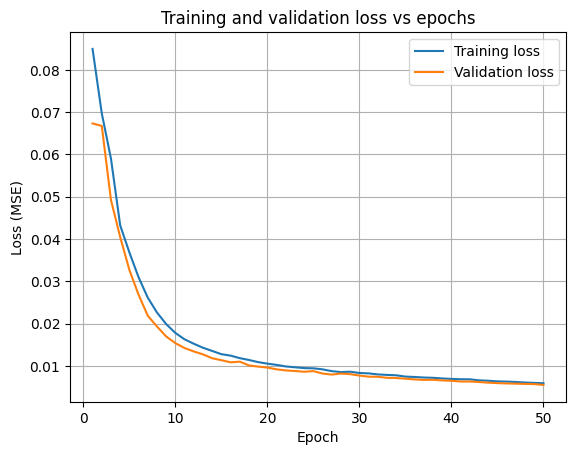

In [25]:
plt.figure()
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training and validation loss vs epochs")
plt.legend()
plt.grid(True)
plt.show()


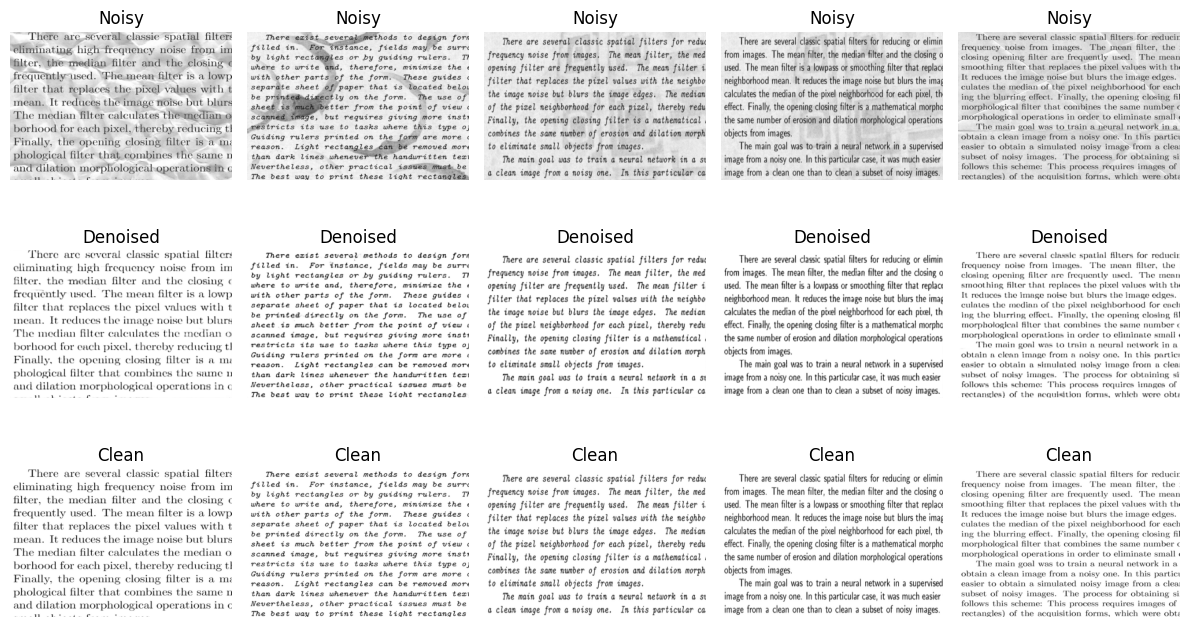

In [26]:
n = min(5, x_test.shape[0])
plt.figure(figsize=(12, 7))

for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(y_pred[i].squeeze(), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

    # Clean GT
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(y_test[i].squeeze(), cmap="gray")
    plt.title("Clean")
    plt.axis("off")

plt.tight_layout()
plt.show()


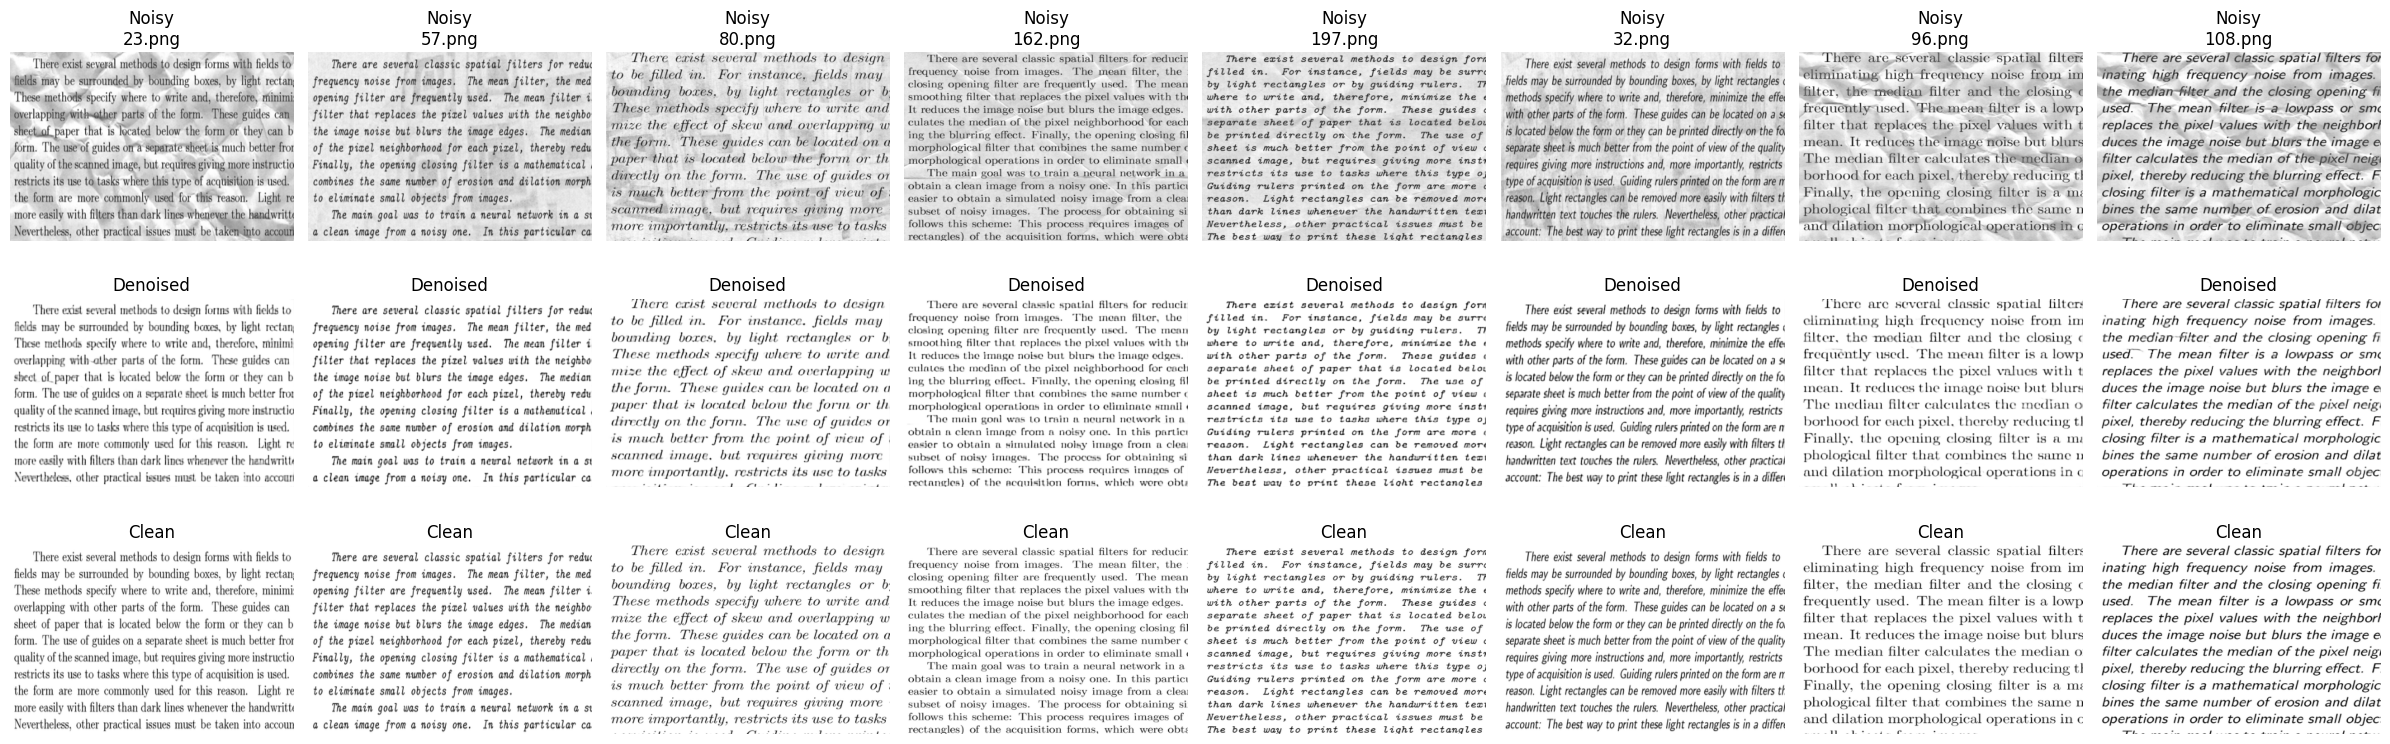

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def show_test_examples(num_examples=8, random=True):
    """
    Show multiple (noisy, denoised, clean) triplets from the test set.
    """
    n = min(num_examples, x_test.shape[0])

    if random:
        idx = np.random.choice(x_test.shape[0], size=n, replace=False)
    else:
        idx = np.arange(n)

    plt.figure(figsize=(3 * n, 8))

    for i, k in enumerate(idx):
        # Noisy
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test[k].squeeze(), cmap="gray")
        plt.title(f"Noisy\n{test_filenames[k]}")
        plt.axis("off")

        # Denoised
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(y_pred[k].squeeze(), cmap="gray")
        plt.title("Denoised")
        plt.axis("off")

        # Clean GT
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(y_test[k].squeeze(), cmap="gray")
        plt.title("Clean")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Show 8 random test examples
show_test_examples(num_examples=8, random=True)


In [29]:
# Show several rows from the MSE/SSIM table
results_df.sample(10, random_state=0)


,filename,MSE,SSIM
20,140.png,0.004338,0.966788
10,150.png,0.006437,0.915708
14,183.png,0.007104,0.942912
13,113.png,0.004769,0.969128
1,194.png,0.008114,0.931429
21,155.png,0.006832,0.906524
11,176.png,0.006909,0.943644
19,23.png,0.005416,0.926101
8,197.png,0.007733,0.935101
6,3.png,0.005630,0.912353
